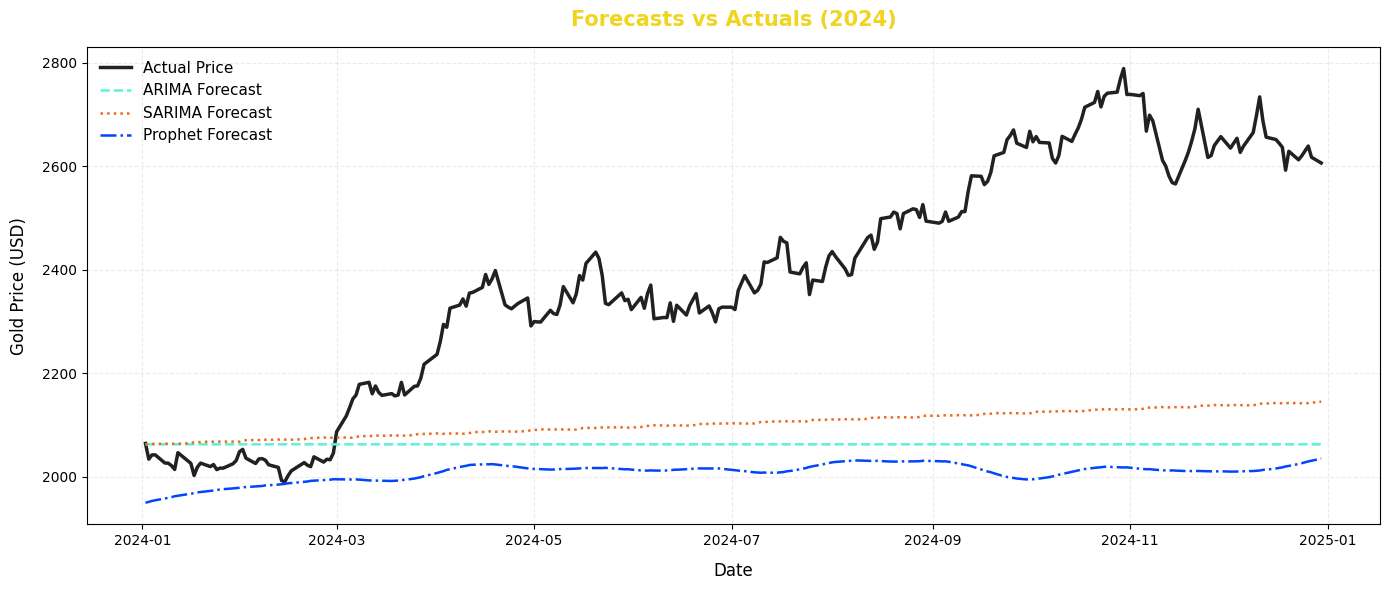

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 🧼 Filter
models_to_plot = ['ARIMA', 'SARIMA', 'Prophet']
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Colors
color_actual = '#212121'
color_arima = '#5DF2D6'
color_sarima = '#EA6B20'
color_prophet = '#0046FF'

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot['ARIMA'], label='ARIMA Forecast', color=color_arima, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot['SARIMA'], label='SARIMA Forecast', color=color_sarima, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot['Prophet'], label='Prophet Forecast', color=color_prophet, linestyle='-.', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts vs Actuals (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Save with transparent background
output_path = os.path.join(output_dir, 'forecast_no_exog_slide.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()


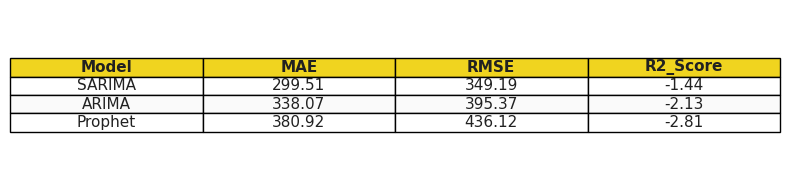

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Filter for ARIMA, SARIMA, Prophet only
models = ['ARIMA', 'SARIMA', 'Prophet']
metrics_filtered = metrics_df[metrics_df['Model'].isin(models)][['Model', 'MAE', 'RMSE', 'R2_Score']]

# ✨ Round values for display
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='RMSE')  # Optional: sort by performance

# 🎨 Table colors (Material Yellow + Gray)
header_color = '#F0D41F'
text_color = '#212121'
row_colors = ['#FAFAFA', '#FFFFFF']  # subtle alternation

# 📋 Plot table
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust height for slide fit
ax.axis('off')  # No borders

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color]*4
)

# ✏️ Style table
table.auto_set_font_size(False)
table.set_fontsize(11)

for i, key in table.get_celld().items():
    cell = table.get_celld()[i]
    if i[0] == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[i[0] % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_no_exog_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()


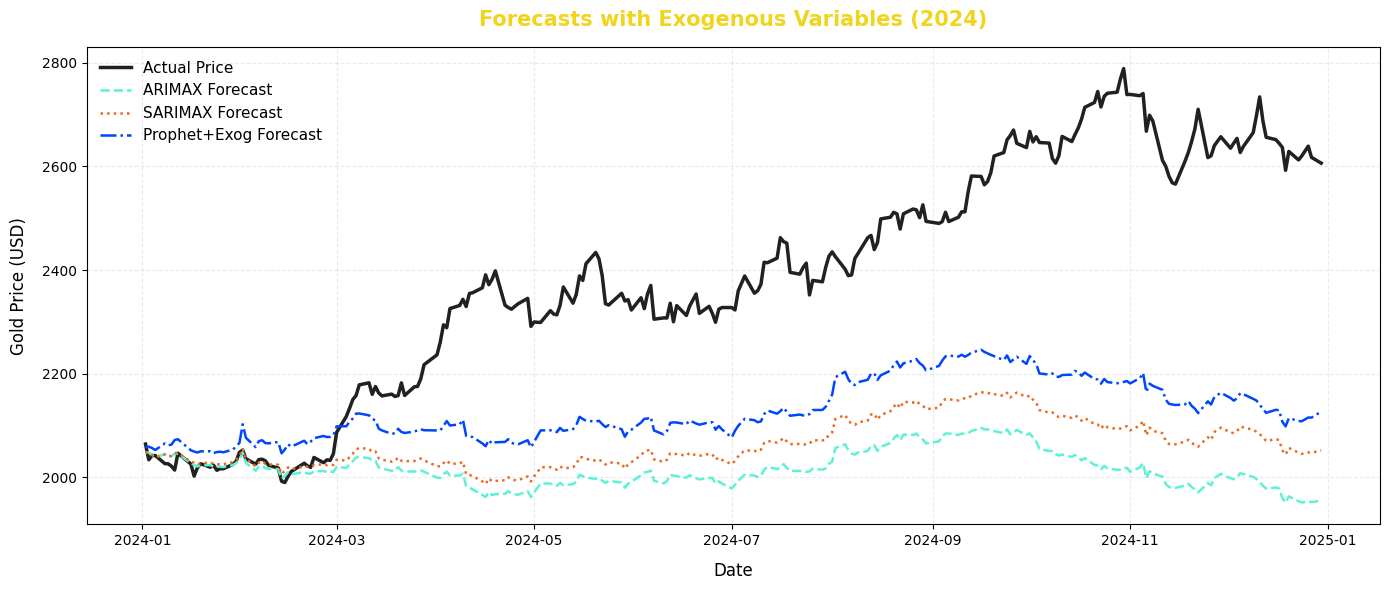

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 🧼 Filter for exogenous models
models_to_plot = ['ARIMAX', 'SARIMAX', 'Prophet + Exog']
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Colors
color_actual = '#212121'     # Dark Gray
color_arimax = '#5DF2D6'     # Aqua 200
color_sarimax = '#EA6B20'    # Orange 600
color_prophet_exog = '#0046FF'  # Blue 500

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot['ARIMAX'], label='ARIMAX Forecast', color=color_arimax, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot['SARIMAX'], label='SARIMAX Forecast', color=color_sarimax, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot['Prophet + Exog'], label='Prophet+Exog Forecast', color=color_prophet_exog, linestyle='-.', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts with Exogenous Variables (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Save with transparent background
output_path = os.path.join(output_dir, 'forecast_exog_slide.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()

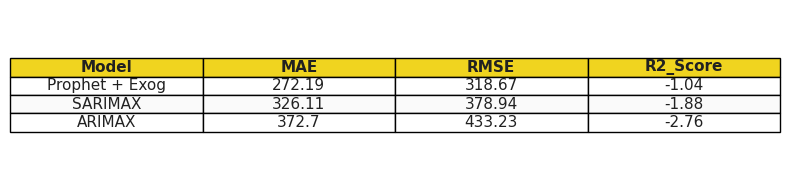

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Filter for Exogenous models
models_exog = ['ARIMAX', 'SARIMAX', 'Prophet + Exog']
metrics_filtered = metrics_df[metrics_df['Model'].isin(models_exog)][['Model', 'MAE', 'RMSE', 'R2_Score']]

# ✨ Round values
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='RMSE')  # Optional sort

# 🎨 Material Design Colors
header_color = '#F0D41F'     # Primary Yellow
text_color = '#212121'       # Dark Gray
row_colors = ['#FAFAFA', '#FFFFFF']  # Soft alternating rows

# 📋 Plot Table
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color]*4
)

# ✏️ Style
table.auto_set_font_size(False)
table.set_fontsize(11)

for i, cell in table.get_celld().items():
    if i[0] == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[i[0] % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_exog_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()


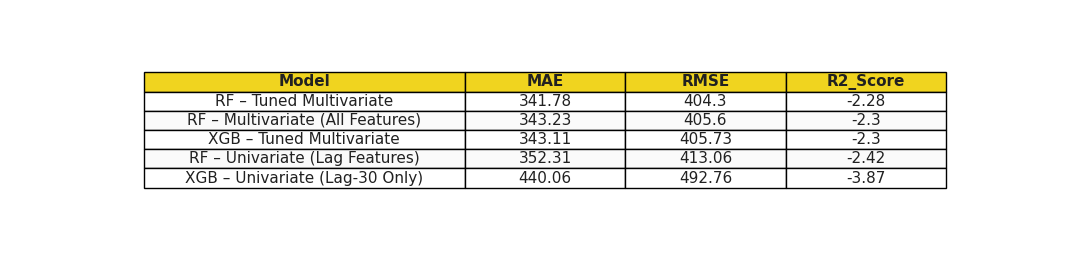

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Filter specific models
models_to_keep = [
    "RF – Univariate (Lag Features)",
    "RF – Multivariate (All Features)",
    "RF – Tuned Multivariate",
    "XGB – Univariate (Lag-30 Only)",
    "XGB – Tuned Multivariate"
]

metrics_filtered = metrics_df[metrics_df['Model'].isin(models_to_keep)][['Model', 'MAE', 'RMSE', 'R2_Score']]
metrics_filtered = metrics_filtered.rename(columns={"Model": "Model"})

# ✨ Round + sort
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='RMSE')

# 🎨 Colors
header_color = '#F0D41F'
text_color = '#212121'
row_colors = ['#FAFAFA', '#FFFFFF']

# 📋 Plot
fig, ax = plt.subplots(figsize=(11, 2.7))  # Wider to accommodate longer model names
ax.axis('off')

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color] * 4
)

# ✏️ Style table
table.auto_set_font_size(False)
table.set_fontsize(11)

# Manually set column widths
for i, cell in table.get_celld().items():
    col, row = i[1], i[0]
    if col == 0:  # Model column
        cell.set_width(0.3)  # Wider
    else:
        cell.set_width(0.15)  # Narrower, equal width

    # Header
    if row == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[row % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_ml_5models_named_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()


In [28]:
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Model'].unique()


array(['ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX', 'Prophet',
       'Prophet + Exog', 'Random Forest (Univariate)',
       'Random Forest (Multivariate)', 'XGBoost (Univariate)',
       'XGBoost (Univariate gold_lag_7)',
       'XGBoost (Univariate gold_lag_30)',
       'XGBoost (Univariate - all lags)', 'XGBoost (Multivariate)',
       'Random Forest (Tuned)', 'XGBoost (Tuned)', 'LSTM',
       'LSTM (Multivariate)', 'LSTM (Semi-Multivariate)',
       'Ensemble (Average)', 'Ensemble (Weighted)'], dtype=object)

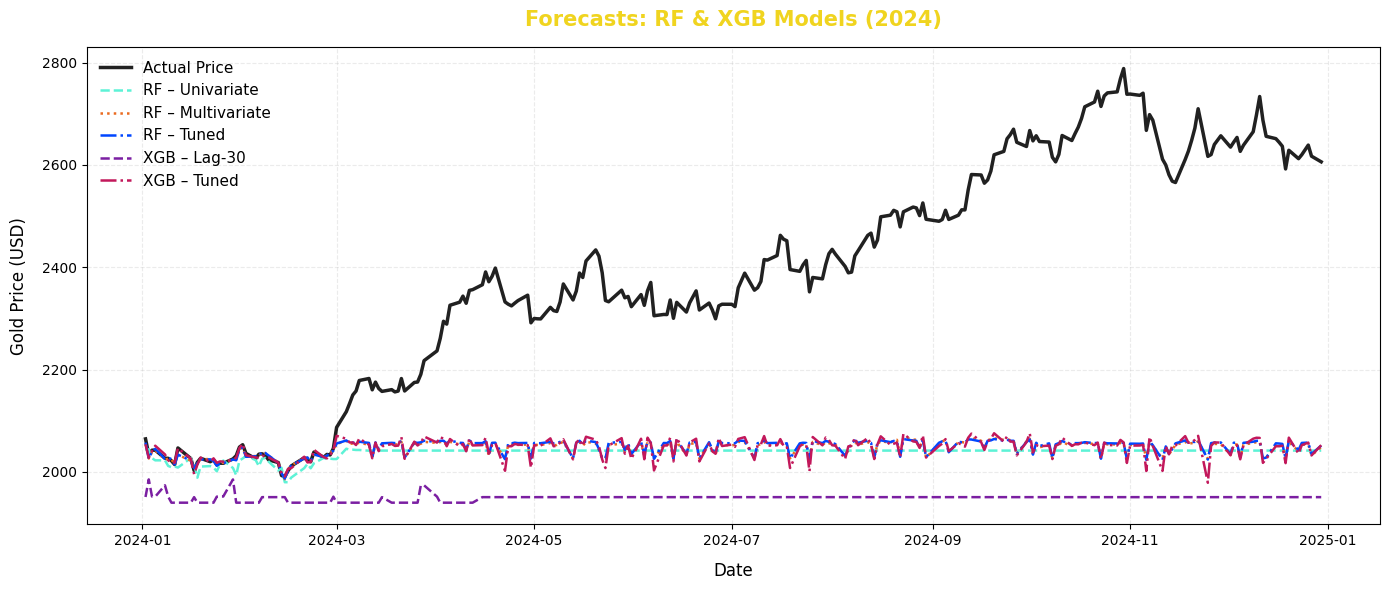

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Use actual model names from your file
models_to_plot = [
    "Random Forest (Univariate)",
    "Random Forest (Multivariate)",
    "Random Forest (Tuned)",
    "XGBoost (Univariate gold_lag_30)",
    "XGBoost (Tuned)"
]
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Colors
color_actual = '#212121'
color_rf_uni = '#5DF2D6'
color_rf_multi = '#EA6B20'
color_rf_tuned = '#0046FF'
color_xgb_uni = '#7B1FA2'
color_xgb_tuned = '#C2185B'

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot["Random Forest (Univariate)"], label='RF – Univariate', color=color_rf_uni, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["Random Forest (Multivariate)"], label='RF – Multivariate', color=color_rf_multi, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["Random Forest (Tuned)"], label='RF – Tuned', color=color_rf_tuned, linestyle='-.', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["XGBoost (Univariate gold_lag_30)"], label='XGB – Lag-30', color=color_xgb_uni, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["XGBoost (Tuned)"], label='XGB – Tuned', color=color_xgb_tuned, linestyle='-.', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts: RF & XGB Models (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Save
output_path = os.path.join(output_dir, 'forecast_ml_5models_plot.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()


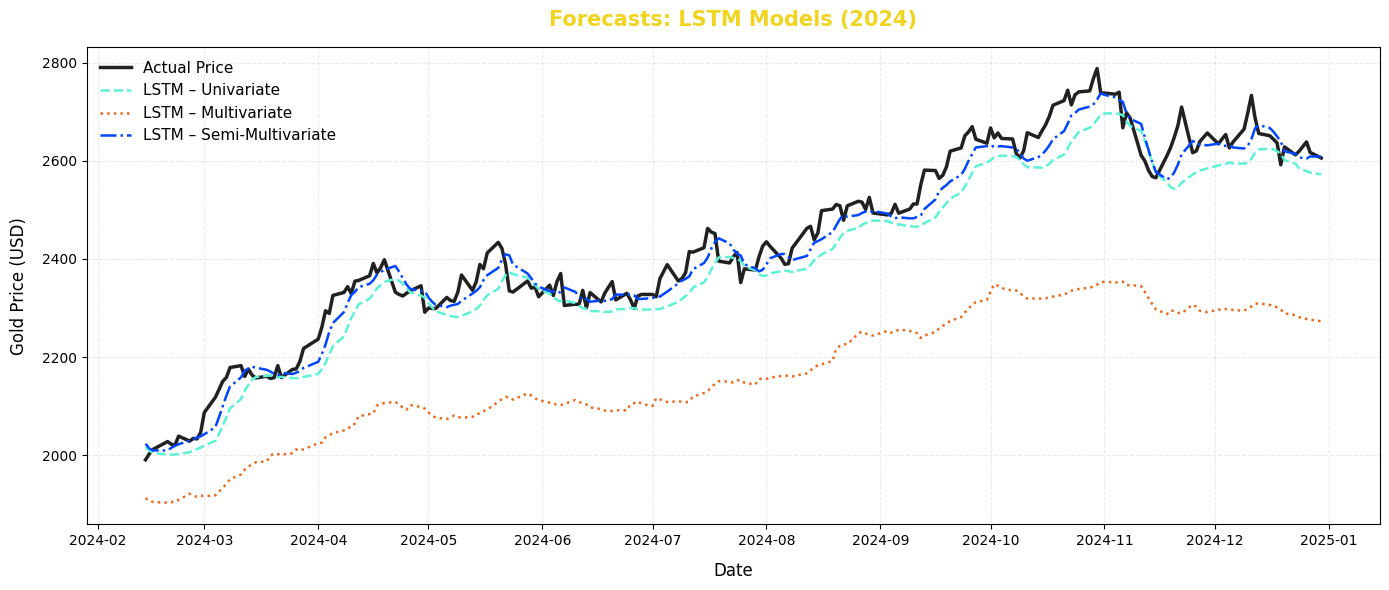

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Filter only LSTM models
models_to_plot = [
    "LSTM",
    "LSTM (Multivariate)",
    "LSTM (Semi-Multivariate)"
]
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Colors
color_actual = '#212121'       # Dark Gray
color_lstm_uni = '#5DF2D6'     # Aqua 200
color_lstm_multi = '#EA6B20'   # Orange 600
color_lstm_semi = '#0046FF'    # Blue 500

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot["LSTM"], label='LSTM – Univariate', color=color_lstm_uni, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["LSTM (Multivariate)"], label='LSTM – Multivariate', color=color_lstm_multi, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["LSTM (Semi-Multivariate)"], label='LSTM – Semi-Multivariate', color=color_lstm_semi, linestyle='-.', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts: LSTM Models (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Save
output_path = os.path.join(output_dir, 'forecast_lstm_models_plot.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()


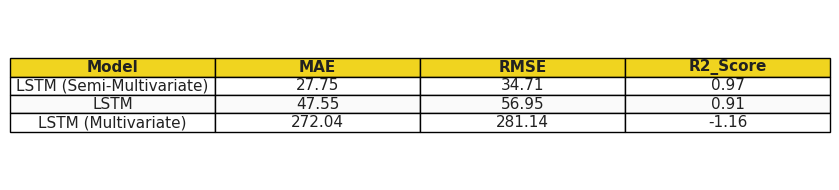

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Filter for LSTM models
models_lstm = ['LSTM', 'LSTM (Multivariate)', 'LSTM (Semi-Multivariate)']
metrics_filtered = metrics_df[metrics_df['Model'].isin(models_lstm)][['Model', 'MAE', 'RMSE', 'R2_Score']]

# ✨ Round + sort
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='RMSE')

# 🎨 Material Design Colors
header_color = '#F0D41F'     # Primary Yellow
text_color = '#212121'       # Dark Gray
row_colors = ['#FAFAFA', '#FFFFFF']  # Alternating background

# 📋 Plot Table
fig, ax = plt.subplots(figsize=(8.5, 2))
ax.axis('off')

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color]*4
)

# ✏️ Style
table.auto_set_font_size(False)
table.set_fontsize(11)

for i, cell in table.get_celld().items():
    if i[0] == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[i[0] % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_lstm_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()


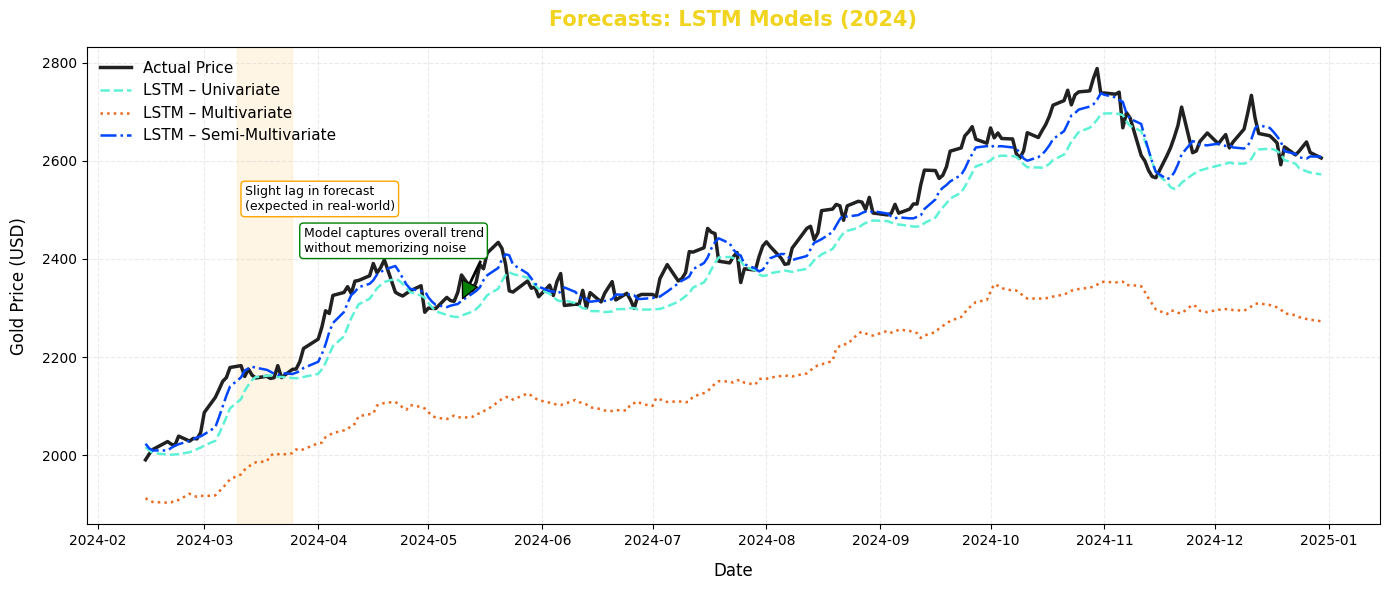

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Filter only LSTM models
models_to_plot = [
    "LSTM",
    "LSTM (Multivariate)",
    "LSTM (Semi-Multivariate)"
]
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Colors
color_actual = '#212121'       # Dark Gray
color_lstm_uni = '#5DF2D6'     # Aqua 200
color_lstm_multi = '#EA6B20'   # Orange 600
color_lstm_semi = '#0046FF'    # Blue 500
highlight_color = 'orange'

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot["LSTM"], label='LSTM – Univariate', color=color_lstm_uni, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["LSTM (Multivariate)"], label='LSTM – Multivariate', color=color_lstm_multi, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["LSTM (Semi-Multivariate)"], label='LSTM – Semi-Multivariate', color=color_lstm_semi, linestyle='-.', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts: LSTM Models (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 🔶 Highlight March spike
plt.axvspan(pd.to_datetime("2024-03-10"), pd.to_datetime("2024-03-25"), color=highlight_color, alpha=0.1)
plt.text(pd.to_datetime("2024-03-12"), 2500,
         "Slight lag in forecast\n(expected in real-world)",
         fontsize=9, bbox=dict(facecolor='white', edgecolor=highlight_color, boxstyle='round,pad=0.3'))

# 📌 Trend annotation on Semi-Multivariate
try:
    forecast_series = df_pivot["LSTM (Semi-Multivariate)"]
    idx = 60
    plt.annotate(
        "Model captures overall trend\nwithout memorizing noise",
        xy=(df_pivot.index[idx], forecast_series.iloc[idx]),
        xytext=(df_pivot.index[30], forecast_series.iloc[idx] + 100),
        arrowprops=dict(facecolor='green', shrink=0.05, width=1),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white'),
        fontsize=9
    )
except IndexError:
    print("⚠️ Not enough data for trend annotation. Adjust index if needed.")

plt.tight_layout()

# 🖼️ Save
output_path = os.path.join(output_dir, 'forecast_lstm_models_plot.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()


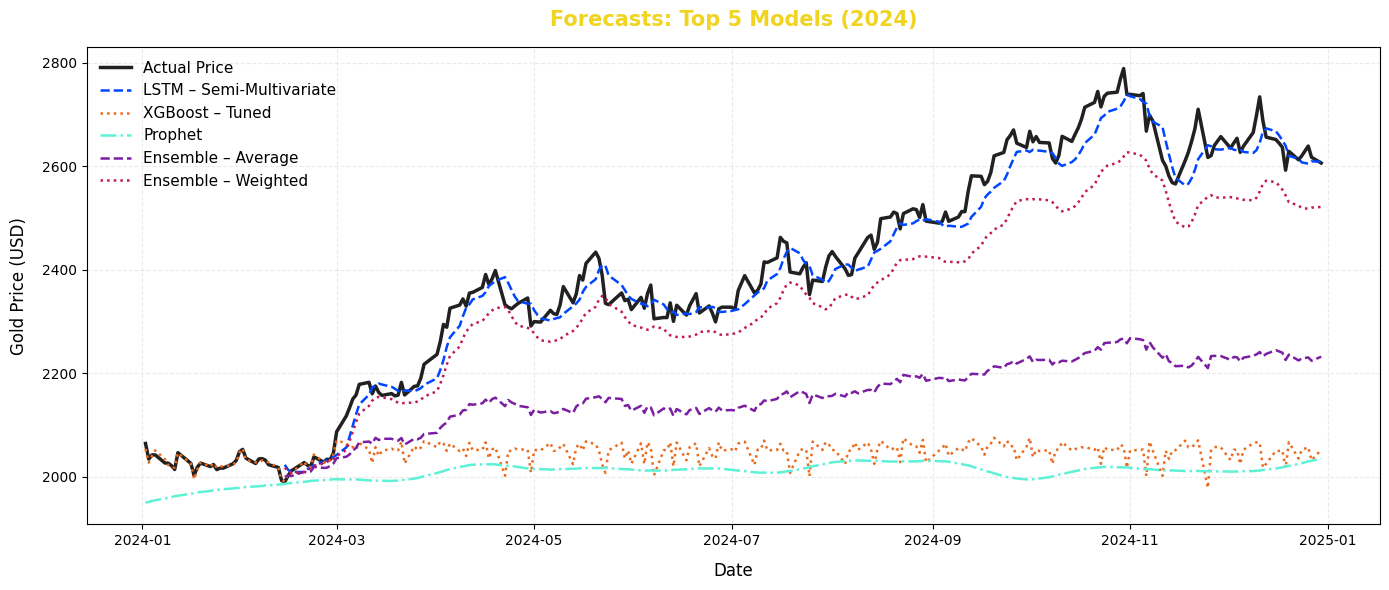

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure results/plots directory exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load + format
df = pd.read_csv('../../results/model_forecasts_log.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Filter the 5 models
models_to_plot = [
    "LSTM (Semi-Multivariate)",
    "XGBoost (Tuned)",
    "Prophet",
    "Ensemble (Average)",
    "Ensemble (Weighted)"
]
df_filtered = df[df['Model'].isin(models_to_plot)]

# 📊 Pivot to wide format
df_pivot = df_filtered.pivot(index='Date', columns='Model', values='Forecast')
df_pivot['Actual'] = df_filtered.groupby('Date')['Actual'].first()

# 🎨 Material Color Palette
color_actual = '#212121'        # Dark Gray
color_lstm_semi = '#0046FF'     # Blue 500
color_xgb_tuned = '#EA6B20'     # Orange 600
color_prophet = '#5DF2D6'       # Aqua 200
color_ens_avg = '#7B1FA2'       # Purple
color_ens_weight = '#C2185B'    # Magenta

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pivot.index, df_pivot['Actual'], label='Actual Price', color=color_actual, linewidth=2.5)
plt.plot(df_pivot.index, df_pivot["LSTM (Semi-Multivariate)"], label='LSTM – Semi-Multivariate', color=color_lstm_semi, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["XGBoost (Tuned)"], label='XGBoost – Tuned', color=color_xgb_tuned, linestyle=':', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["Prophet"], label='Prophet', color=color_prophet, linestyle='-.', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["Ensemble (Average)"], label='Ensemble – Average', color=color_ens_avg, linestyle='--', linewidth=1.8)
plt.plot(df_pivot.index, df_pivot["Ensemble (Weighted)"], label='Ensemble – Weighted', color=color_ens_weight, linestyle=':', linewidth=1.8)

# ✨ Styling
plt.title('Forecasts: Top 5 Models (2024)', fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Save
output_path = os.path.join(output_dir, 'forecast_top5_models_plot.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()


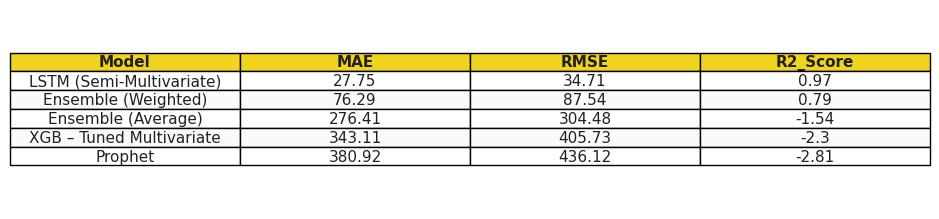

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Filter for the top 5 models
models_top5 = [
    "LSTM (Semi-Multivariate)",
    "XGB – Tuned Multivariate",
    "Prophet",
    "Ensemble (Average)",
    "Ensemble (Weighted)"
]
metrics_filtered = metrics_df[metrics_df['Model'].isin(models_top5)][['Model', 'MAE', 'RMSE', 'R2_Score']]

# ✨ Round + sort
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='RMSE')

# 🎨 Material Design Colors
header_color = '#F0D41F'     # Primary Yellow
text_color = '#212121'       # Dark Gray
row_colors = ['#FAFAFA', '#FFFFFF']  # Alternating background

# 📋 Plot Table
fig, ax = plt.subplots(figsize=(9.5, 2.3))  # Widen for model names
ax.axis('off')

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color] * 4
)

# ✏️ Style
table.auto_set_font_size(False)
table.set_fontsize(11)

for i, cell in table.get_celld().items():
    if i[0] == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[i[0] % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_top5_models_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()


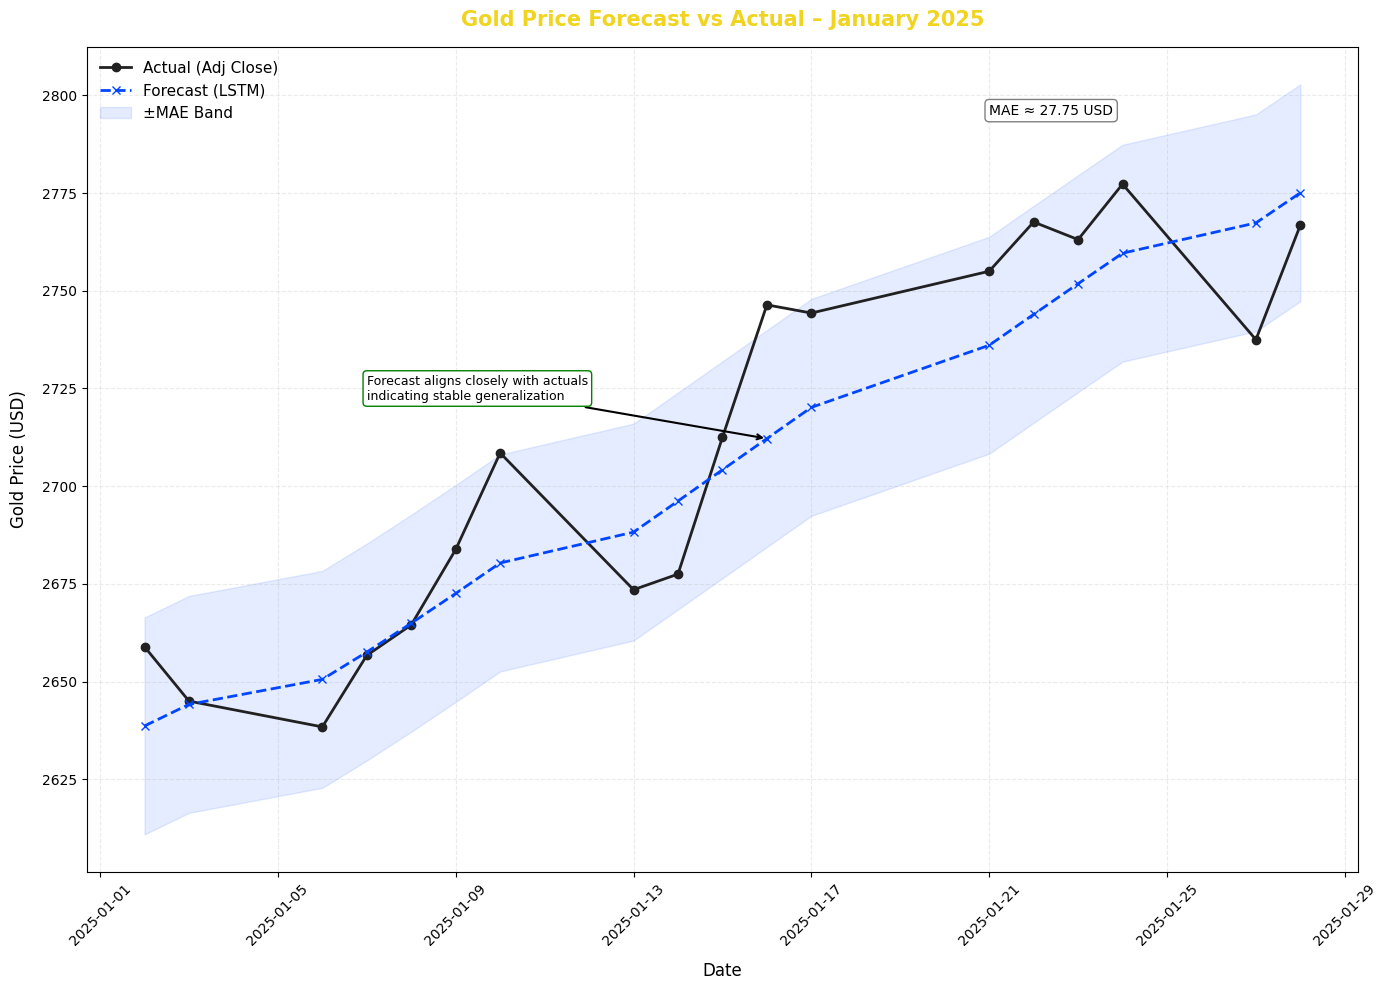

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Forecasted Values ---
forecast_data = {
    "Date": [
        "2025-01-01", "2025-01-02", "2025-01-03", "2025-01-06", "2025-01-07", "2025-01-08",
        "2025-01-09", "2025-01-10", "2025-01-13", "2025-01-14", "2025-01-15", "2025-01-16",
        "2025-01-17", "2025-01-20", "2025-01-21", "2025-01-22", "2025-01-23", "2025-01-24",
        "2025-01-27", "2025-01-28"
    ],
    "Forecast": [
        2634.551001, 2638.636413, 2644.155821, 2650.560691, 2657.550967, 2664.925403,
        2672.549972, 2680.345751, 2688.241687, 2696.198318, 2704.184468, 2712.176832,
        2720.160081, 2728.121477, 2736.057703, 2743.954882, 2751.808870, 2759.614281,
        2767.369355, 2775.076578
    ]
}

# --- Actual Prices ---
actual_data = {
    "Date": [
        "2025-01-02", "2025-01-03", "2025-01-06", "2025-01-07", "2025-01-08", "2025-01-09",
        "2025-01-10", "2025-01-13", "2025-01-14", "2025-01-15", "2025-01-16", "2025-01-17",
        "2025-01-21", "2025-01-22", "2025-01-23", "2025-01-24", "2025-01-27", "2025-01-28",
        "2025-01-29", "2025-01-30"
    ],
    "Actual": [
        2658.90, 2645.00, 2638.40, 2656.70, 2664.50, 2683.80, 2708.50, 2673.50, 2677.50,
        2712.50, 2746.40, 2744.30, 2755.00, 2767.60, 2763.10, 2777.30, 2737.50, 2766.80,
        2769.10, 2823.00
    ]
}

# --- Prepare Data ---
df_forecast = pd.DataFrame(forecast_data)
df_actual = pd.DataFrame(actual_data)
df_forecast["Date"] = pd.to_datetime(df_forecast["Date"])
df_actual["Date"] = pd.to_datetime(df_actual["Date"])
df_merged = pd.merge(df_forecast, df_actual, on="Date", how="inner")

# --- Output Path ---
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'forecast_vs_actual_jan2025.png')

# 🎨 Colors
color_actual = '#212121'
color_forecast = '#0046FF'
highlight_color = 'green'

# 📈 Plot
plt.figure(figsize=(14, 10)) 
plt.plot(df_merged["Date"], df_merged["Actual"], label="Actual (Adj Close)", color=color_actual, marker='o', linewidth=2)
plt.plot(df_merged["Date"], df_merged["Forecast"], label="Forecast (LSTM)", color=color_forecast, marker='x', linestyle='--', linewidth=2)

# --- Shaded MAE Band ---
mae_value = 27.75  # From your metrics
plt.fill_between(df_merged["Date"],
                 df_merged["Forecast"] - mae_value,
                 df_merged["Forecast"] + mae_value,
                 color=color_forecast,
                 alpha=0.1,
                 label="±MAE Band")


# ✨ Styling
plt.title("Gold Price Forecast vs Actual – January 2025", fontsize=15, fontweight='bold', color='#F0D41F', pad=15)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Gold Price (USD)", fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend(frameon=False, fontsize=11, loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# 📝 Add Annotation
plt.annotate(
    "Forecast aligns closely with actuals\nindicating stable generalization",
    xy=(df_merged["Date"].iloc[10], df_merged["Forecast"].iloc[10]),
    xytext=(df_merged["Date"].iloc[3], df_merged["Forecast"].iloc[10] + 10),
    arrowprops=dict(facecolor=highlight_color, arrowstyle='->', lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor=highlight_color, facecolor='white'),
    fontsize=9
)

# --- MAE Annotation Box ---
plt.text(df_merged["Date"].iloc[-6], df_merged["Forecast"].max() + 20,
         f"MAE ≈ {mae_value:.2f} USD",
         fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor='gray'))


# Final Layout + Save
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


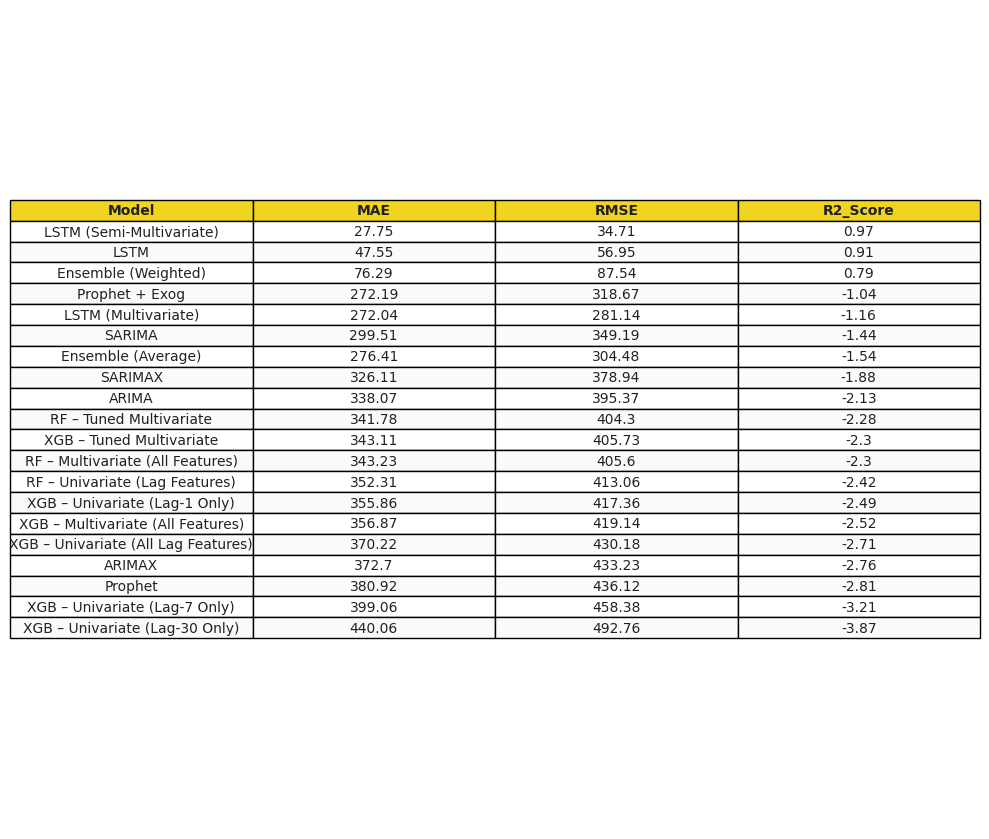

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Ensure output folder exists
output_dir = '../../results/plots'
os.makedirs(output_dir, exist_ok=True)

# ✅ Load full metrics data
metrics_df = pd.read_csv('../../results/model_metrics_log.csv')

# 🧼 Keep only relevant columns
metrics_filtered = metrics_df[['Model', 'MAE', 'RMSE', 'R2_Score']]

# ✨ Round + sort by R² Score (higher is better)
metrics_filtered = metrics_filtered.round(2)
metrics_filtered = metrics_filtered.sort_values(by='R2_Score', ascending=False)

# 🎨 Material Design Colors
header_color = '#F0D41F'     # Primary Yellow
text_color = '#212121'       # Dark Gray
row_colors = ['#FAFAFA', '#FFFFFF']  # Alternating background

# 📋 Plot Table
fig_height = 0.5 + 0.4 * len(metrics_filtered)  # Auto scale height by # rows
fig, ax = plt.subplots(figsize=(10, fig_height))
ax.axis('off')

table = ax.table(
    cellText=metrics_filtered.values,
    colLabels=metrics_filtered.columns,
    cellLoc='center',
    loc='center',
    colColours=[header_color] * len(metrics_filtered.columns)
)

# ✏️ Style
table.auto_set_font_size(False)
table.set_fontsize(10)

for i, cell in table.get_celld().items():
    if i[0] == 0:
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[i[0] % 2])
        cell.set_text_props(color=text_color)

plt.tight_layout()

# 🖼️ Save
plt.savefig(os.path.join(output_dir, 'metrics_all_models_table.png'), dpi=300, bbox_inches='tight', transparent=True)

plt.show()
